<div class="usecase-title">Melbourne House Market Analysis</div>

<div class="usecase-authors"><b>Authored by: </b>Bao Ngo</div>

<div class="usecase-date"><b>Date: </b> July 2024</div>

<div class="usecase-duration"><b>Duration:</b> 90 mins</div>

<div class="usecase-level-skill"></div>
    <div class="usecase-level"><b> Level: </b>Intermediate</div>
    <div class="usecase-skill"><b> Pre-requisite Skills: </b>Python </div>

<div class="usecase-section-header">Scenario</div>

1. Introduction:
The aim of this proposal is to leverage available datasets to create a comprehensive analysis of the Melbourne housing market. By utilizing various datasets provided by the City of Melbourne and external sources such as Kaggle, we aim to develop insights into housing price trends, identify factors influencing house prices, and provide valuable information for buyers, sellers, real estate agents, investors, and policymakers.

2. Objectives:
Analyze the Melbourne House Prices dataset to understand historical and current housing price trends.
Utilize data on property sales transactions to assess market activity and price fluctuations.
Combine insights from various datasets to forecast future housing prices and identify high-demand areas.

3. Methodology:
Data Collection: Gather datasets from the City of Melbourne Open Data site and Kaggle, including Melbourne House Prices.
Data Cleaning and Preparation: Clean and preprocess the datasets to ensure consistency and accuracy.
Data Analysis: Perform statistical analysis, data visualization, and trend analysis to identify patterns, forecast house prices.
Reporting: Generate reports, visualizations, and insights to present findings to stakeholders.

4. Proposed Deliverables:
Comprehensive analysis report on housing market trends in Melbourne.
Visualizations depicting historical and current house price trends and high-demand areas.
Forecasts of future house prices with recommendations for buyers, sellers, and policymakers.

5. Timeline:
Data Collection and Cleaning: 2 weeks
Data Analysis and Visualization: 3 weeks
Report Writing and Presentation: 1 week

### Libraries Used

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import folium
import matplotlib.pyplot as plt
import math
from io import StringIO
from geopy.distance import geodesic
from folium.plugins import MarkerCluster
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import scipy.stats as stats

from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Dependencies
import warnings
warnings.filterwarnings("ignore")

import requests
import numpy as np
import pandas as pd
import io
pd.set_option('display.max_columns', None)

/Users/boapoa/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Load data and perform data preprocessing

In [2]:
# Function to collect datasets using API

def datasetcollect(dataset_id):
    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    #apikey = " "
    dataset_id = dataset_id
    format = 'csv'

    url = f'{base_url}{dataset_id}/exports/{format}'
    params = {
        'select': '*',
        'limit': -1,  # all records
        'lang': 'en',
        'timezone': 'UTC',
        #'api_key': apikey
    }

    # GET request
    response = requests.get(url, params=params)

    if response.status_code == 200:
        # StringIO to read the CSV data
        url_content = response.content.decode('utf-8')
        dataset = pd.read_csv(StringIO(url_content), delimiter=';')
        return dataset
    else:
        print(f'Request failed with status code {response.status_code}')

### Dataset 1: 

In [3]:
dataset_id = 'house-prices-by-small-area-sale-year'
price_area = datasetcollect(dataset_id)
print(len(price_area))

347


In [4]:
price_area.head()

,sale_year,small_area,type,median_price,transaction_count
0,2000,Carlton,House/Townhouse,316250.0,116
1,2000,Carlton,Residential Apartment,220000.0,309
2,2000,East Melbourne,House/Townhouse,622500.0,42
3,2000,East Melbourne,Residential Apartment,295000.0,139
4,2000,Kensington,House/Townhouse,215250.0,258


In [5]:
price_area.value_counts()

sale_year  small_area                    type                   median_price  transaction_count
2000       Carlton                       House/Townhouse        316250.0      116                  1
2011       East Melbourne                House/Townhouse        1352500.0     30                   1
           North Melbourne               Residential Apartment  438000.0      208                  1
                                         House/Townhouse        724750.0      110                  1
           Melbourne (Remainder)         Residential Apartment  631250.0      68                   1
                                                                                                  ..
2005       South Yarra                   House/Townhouse        870000.0      43                   1
           Parkville                     Residential Apartment  295000.0      71                   1
                                         House/Townhouse        845000.0      66                

In [6]:
price_area.describe()

,sale_year,median_price,transaction_count
count,347.000000,3.190000e+02,347.000000
mean,2008.268012,6.612860e+05,277.051873
std,4.928411,8.863439e+05,480.421188
min,2000.000000,0.000000e+00,1.000000
25%,2004.000000,3.662810e+05,44.500000
50%,2008.000000,4.873000e+05,118.000000
75%,2013.000000,6.787500e+05,224.000000
max,2016.000000,1.430000e+07,3766.000000


### Dataset 2: House price

In [7]:
melbourne_house_prices = pd.read_csv("MELBOURNE_HOUSE_PRICES_LESS.csv")


In [8]:
melbourne_house_prices.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [9]:
# Display basic information and summary statistics
print("Dataset Information:")
melbourne_house_prices.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


In [10]:
print("\nSummary Statistics:")
print(melbourne_house_prices.describe(include='all'))


Summary Statistics:
           Suburb       Address         Rooms   Type         Price Method  \
count       63023         63023  63023.000000  63023  4.843300e+04  63023   
unique        380         57754           NaN      3           NaN      9   
top     Reservoir  5 Charles St           NaN      h           NaN      S   
freq         1241             7           NaN  45053           NaN  34063   
mean          NaN           NaN      3.110595    NaN  9.978982e+05    NaN   
std           NaN           NaN      0.957551    NaN  5.934989e+05    NaN   
min           NaN           NaN      1.000000    NaN  8.500000e+04    NaN   
25%           NaN           NaN      3.000000    NaN  6.200000e+05    NaN   
50%           NaN           NaN      3.000000    NaN  8.300000e+05    NaN   
75%           NaN           NaN      4.000000    NaN  1.220000e+06    NaN   
max           NaN           NaN     31.000000    NaN  1.120000e+07    NaN   

       SellerG        Date      Postcode             R

In [11]:
print("\nMissing Values:")
print(melbourne_house_prices.isnull().sum())


Missing Values:
Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64


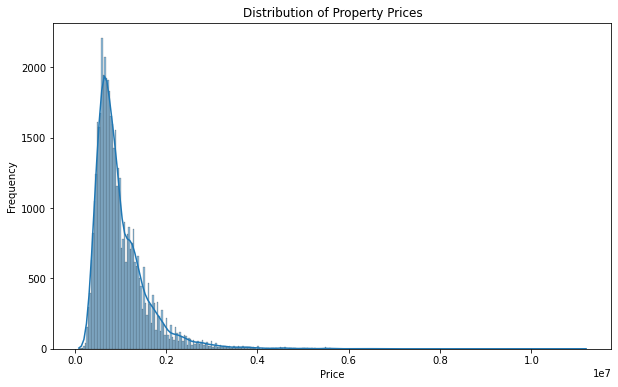

In [12]:
# Plotting distribution of property prices
plt.figure(figsize=(10, 6))
sns.histplot(melbourne_house_prices['Price'].dropna(), kde=True)
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

* Right-Skewed Distribution:
The histogram shows a right-skewed distribution, indicating that most properties are priced at the lower end of the scale.
The frequency of properties decreases as the price increases.

* Majority of Prices:
A significant number of properties have prices concentrated below the 2,000,000 mark.
The peak of the distribution is around the 500,000 to 1,000,000 range, where the highest frequency of property prices is observed.

* High-Value Outliers:
There are a few properties with very high prices (over $4,000,000), which are considered outliers.
These high-value properties extend the tail of the distribution, indicating a smaller market segment for luxury properties.

* KDE Line:
The Kernel Density Estimate (KDE) line overlays the histogram, providing a smoothed curve that represents the probability density function of the property prices.
The KDE line reinforces the observation that the majority of properties are concentrated at lower prices with a long tail towards higher prices.



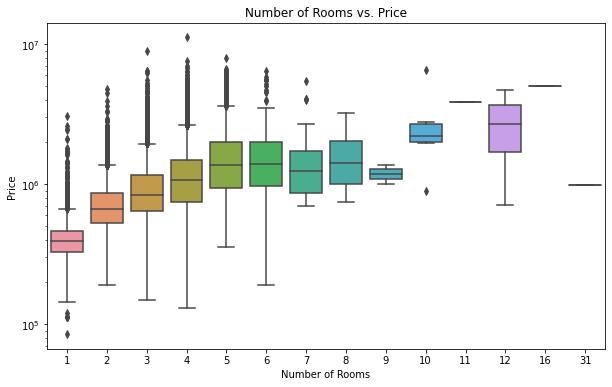

In [13]:
# Plotting number of rooms vs. price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rooms', y='Price', data=melbourne_house_prices)
plt.title('Number of Rooms vs. Price')
plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.yscale('log')
plt.show()


#### General Trend:
There is a clear trend showing that properties with more rooms generally have higher prices.
This is evident from the upward shift of the median price as the number of rooms increases.

* Price Distribution by Room Count:
1-2 Rooms: These properties tend to have the lowest prices, with most prices concentrated below $1,000,000.
3-4 Rooms: Prices increase significantly, and there is more variability in prices within these categories.
5-6 Rooms: The median prices continue to rise, and there are more outliers at the higher end.
7+ Rooms: Properties with 7 or more rooms show even higher prices, with substantial variability and a higher number of outliers.
  
* Outliers:
The plot shows a significant number of outliers, especially for properties with fewer rooms. These outliers could represent luxury apartments or houses in prime locations.
Properties with 1 or 2 rooms have some very high-priced outliers, indicating that room count alone doesn't fully determine the price.

* Box Width and Whiskers:
The width of the boxes represents the interquartile range (IQR), showing the middle 50% of the data.
The whiskers extend to 1.5 times the IQR from the quartiles, capturing most of the data while highlighting the outliers beyond this range.

#### Interpretation:
* Room Count vs. Price:
Generally, an increase in the number of rooms correlates with higher property prices.
This suggests that larger properties (in terms of room count) tend to be more expensive.

* Market Segmentation:
The presence of high-priced outliers, even in properties with fewer rooms, indicates that factors other than room count, such as location, amenities, and property type, also play a significant role in determining price.
=> It would be beneficial to explore other features, such as location (suburb, region), property type, and property condition, to gain a more comprehensive understanding of the factors influencing property prices.

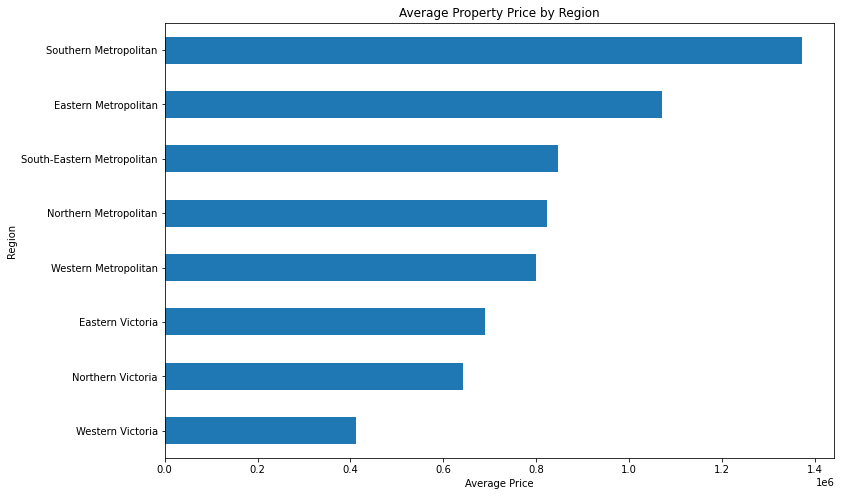

In [14]:
# Average price by region
avg_price_by_region = melbourne_house_prices.groupby('Regionname')['Price'].mean().sort_values()

plt.figure(figsize=(12, 8))
avg_price_by_region.plot(kind='barh')
plt.title('Average Property Price by Region')
plt.xlabel('Average Price')
plt.ylabel('Region')
plt.show()

* Southern Metropolitan:
This region has the highest average property price, significantly higher than other regions. It indicates that Southern Metropolitan is likely one of the most expensive and possibly affluent areas in Melbourne.

* Eastern Metropolitan:
The second highest average property price is observed in Eastern Metropolitan, suggesting that this region also contains high-value properties, possibly due to desirable residential areas or proximity to essential amenities.

* Regional Comparison:
  
South-Eastern Metropolitan, Northern Metropolitan, and Western Metropolitan: These regions have moderate average property prices, indicating a balance between affordability and value. They are likely to contain both high and mid-range priced properties.

Eastern Victoria, Northern Victoria, and Western Victoria: These regions have the lowest average property prices. This could be due to a variety of factors such as distance from the city center, less urban development, or different local market conditions.
  
* Regional Distribution:
The clear distinction in average prices among different regions highlights the disparity in property values across Melbourne. This could be influenced by factors like socio-economic status, infrastructure development, access to amenities, and overall desirability of the regions.

* Market Insights:
Potential buyers and investors can use this information to identify regions that align with their budget and investment goals. For instance, those looking for high-end properties might focus on Southern and Eastern Metropolitan, while those seeking more affordable options might consider regions like Western Victoria.

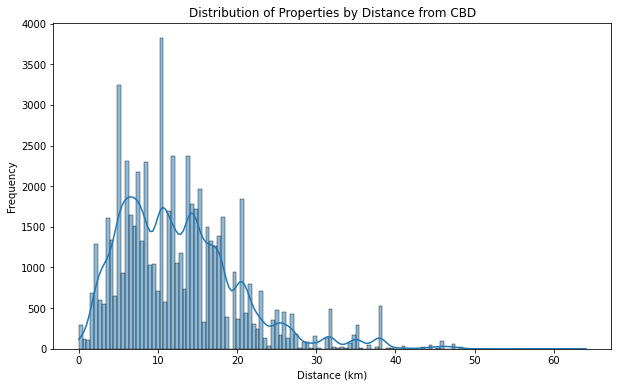

In [15]:
# Distribution of properties by distance from CBD
plt.figure(figsize=(10, 6))
sns.histplot(melbourne_house_prices['Distance'], kde=True)
plt.title('Distribution of Properties by Distance from CBD')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.show()

* Concentration of Properties:
The majority of properties are located within 10 to 20 kilometers from the CBD.
There is a significant drop in the number of properties as the distance increases beyond 20 kilometers.

* Peaks and Troughs:
There are noticeable peaks at certain distances, particularly around 10 km and 15-20 km. These peaks suggest popular residential zones within these distances from the CBD.
The troughs between these peaks may indicate areas with fewer residential properties, possibly due to industrial zones, commercial areas, or natural barriers.

* Decreasing Trend:
As expected, the number of properties decreases as the distance from the CBD increases. This trend is typical as central locations are generally more developed and densely populated.

* Long Tail:
The histogram shows a long tail extending beyond 30 kilometers, with fewer properties located in these distant areas.
These outlying areas could include rural or semi-rural regions, which are less densely populated.

* Property Demand:
The higher concentration of properties within 10-20 km suggests that these areas are in high demand due to their proximity to the CBD, offering better access to jobs, amenities, and services.

* Real Estate Insights:
Buyers and investors can use this information to understand the density and availability of properties relative to the CBD. Proximity to the CBD often correlates with higher property values due to convenience and accessibility.


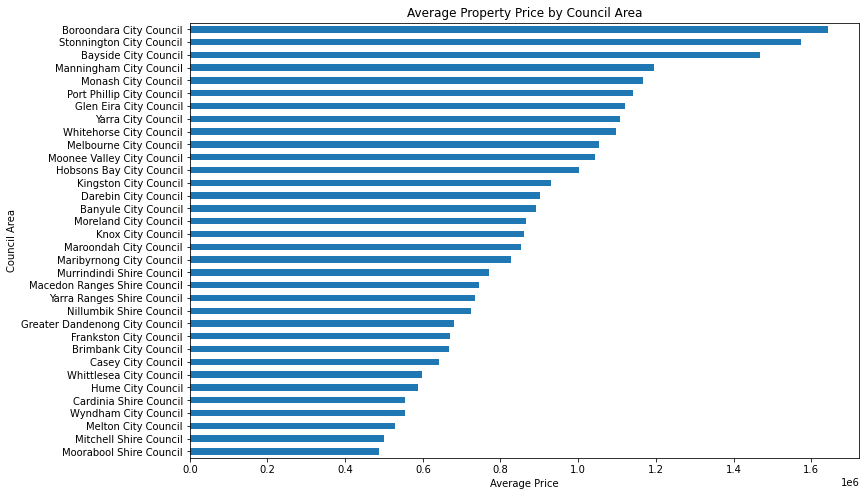

In [16]:
# Average price by council area
avg_price_by_council = melbourne_house_prices.groupby('CouncilArea')['Price'].mean().sort_values()

plt.figure(figsize=(12, 8))
avg_price_by_council.plot(kind='barh')
plt.title('Average Property Price by Council Area')
plt.xlabel('Average Price')
plt.ylabel('Council Area')
plt.show()

In [17]:
melbourne_house_prices['Price'].isnull()


0        False
1        False
2        False
3        False
4        False
         ...  
63018    False
63019    False
63020    False
63021     True
63022     True
Name: Price, Length: 63023, dtype: bool

In [18]:
melbourne_house_prices.dropna(inplace=True)
melbourne_house_prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48433 entries, 0 to 63020
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         48433 non-null  object 
 1   Address        48433 non-null  object 
 2   Rooms          48433 non-null  int64  
 3   Type           48433 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         48433 non-null  object 
 6   SellerG        48433 non-null  object 
 7   Date           48433 non-null  object 
 8   Postcode       48433 non-null  int64  
 9   Regionname     48433 non-null  object 
 10  Propertycount  48433 non-null  int64  
 11  Distance       48433 non-null  float64
 12  CouncilArea    48433 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 5.2+ MB


### Dataset 3: House price full


In [72]:
df = pd.read_csv("Melbourne_housing_FULL.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [21]:
df.nunique()


Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [22]:
df.shape


(34857, 21)

In [23]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64


In [24]:
df["Rooms"]=df["Rooms"].astype(float)


In [25]:
df.drop_duplicates(inplace=True)


In [26]:
df.shape


(34856, 21)

In [27]:
round((df.describe().T),2)


,count,mean,std,min,25%,50%,75%,max
Rooms,34856.0,3.03,0.97,1.00,2.00,3.00,4.00,16.00
Price,27247.0,1050173.34,641467.13,85000.00,635000.00,870000.00,1295000.00,11200000.00
Distance,34855.0,11.18,6.79,0.00,6.40,10.30,14.00,48.10
Postcode,34855.0,3116.06,109.03,3000.00,3051.00,3103.00,3156.00,3978.00
Bedroom2,26639.0,3.08,0.98,0.00,2.00,3.00,4.00,30.00
Bathroom,26630.0,1.62,0.72,0.00,1.00,2.00,2.00,12.00
Car,26128.0,1.73,1.01,0.00,1.00,2.00,2.00,26.00
Landsize,23046.0,593.61,3398.92,0.00,224.00,521.00,670.00,433014.00
BuildingArea,13741.0,160.25,401.28,0.00,102.00,136.00,188.00,44515.00
YearBuilt,15550.0,1965.29,37.33,1196.00,1940.00,1970.00,2000.00,2106.00


In [28]:
df.dropna(subset = ['Price'],inplace=True)
df.reset_index(drop=True,inplace=True)
df.shape

(27247, 21)

#### Categorical or Numerical Seperation


In [29]:
print(df.select_dtypes(['object']).columns)
obj_cats = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', "Date", 'CouncilArea','Regionname']
for colname in obj_cats:
    df[colname] = df[colname].astype('category')
num_cats = ['Postcode']
for colname in num_cats:
    df[colname] = df[colname].astype('category')
df.info()

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27247 entries, 0 to 27246
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         27247 non-null  category
 1   Address        27247 non-null  category
 2   Rooms          27247 non-null  float64 
 3   Type           27247 non-null  category
 4   Price          27247 non-null  float64 
 5   Method         27247 non-null  category
 6   SellerG        27247 non-null  category
 7   Date           27247 non-null  category
 8   Distance       27246 non-null  float64 
 9   Postcode       27246 non-null  category
 10  Bedroom2       20806 non-null  float64 
 11  Bathroom       20800 non-null  float64 
 12  Car            20423 non-null  float64 
 13  Landsize       17982 non-null  float64 
 14  BuildingArea   10656 non-null  float64 
 1

In [30]:
df['Rooms_Bedroom2'] = df['Rooms'] - df['Bedroom2']
df["Rooms_Bedroom2"].head(10)

0    0.0
1    0.0
2    0.0
3    0.0
4    1.0
5    0.0
6   -1.0
7    0.0
8    NaN
9    NaN
Name: Rooms_Bedroom2, dtype: float64

In [31]:
df = df.drop(['Bedroom2','Rooms_Bedroom2'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27247 entries, 0 to 27246
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         27247 non-null  category
 1   Address        27247 non-null  category
 2   Rooms          27247 non-null  float64 
 3   Type           27247 non-null  category
 4   Price          27247 non-null  float64 
 5   Method         27247 non-null  category
 6   SellerG        27247 non-null  category
 7   Date           27247 non-null  category
 8   Distance       27246 non-null  float64 
 9   Postcode       27246 non-null  category
 10  Bathroom       20800 non-null  float64 
 11  Car            20423 non-null  float64 
 12  Landsize       17982 non-null  float64 
 13  BuildingArea   10656 non-null  float64 
 14  YearBuilt      12084 non-null  float64 
 15  CouncilArea    27244 non-null  category
 16  Lattitude      20993 non-null  float64 
 17  Longtitude     20993 non-null  

#### Imputing Missing Values


In [32]:
categorical_columns=df.iloc[:,[0,1,3,5,6,7,9,15,18]]
numerical_columns=df.iloc[:,[4,2,8,10,11,12,13,14,16,17,19]]
for column in categorical_columns:
    df[column] = df[column].fillna(df[column].mode().iloc[0])
for column in numerical_columns:
    df[column] = df[column].fillna(df[column].median())
df.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [33]:
round((df.describe().T),2)


,count,mean,std,min,25%,50%,75%,max
Rooms,27247.0,2.99,0.95,1.00,2.00,3.0,4.00,16.00
Price,27247.0,1050173.34,641467.13,85000.00,635000.00,870000.0,1295000.00,11200000.00
Distance,27247.0,11.28,6.79,0.00,6.40,10.5,14.00,48.10
Bathroom,27247.0,1.45,0.66,0.00,1.00,1.0,2.00,9.00
Car,27247.0,1.79,0.87,0.00,1.00,2.0,2.00,18.00
Landsize,27247.0,565.78,3052.55,0.00,351.00,512.0,592.00,433014.00
BuildingArea,27247.0,142.32,281.16,0.00,133.00,133.0,133.00,44515.00
YearBuilt,27247.0,1968.50,24.54,1196.00,1970.00,1970.0,1970.00,2019.00
Lattitude,27247.0,-37.81,0.08,-38.19,-37.84,-37.8,-37.77,-37.40
Longtitude,27247.0,145.00,0.11,144.42,144.95,145.0,145.05,145.53


In [34]:
def find_outliers(col):
    z=np.abs(stats.zscore(col))
    idx_outliers=np.where(z>3,True,False)
    return pd.Series(idx_outliers,index=col.index)
idx=find_outliers(df["Landsize"])
idx2=find_outliers(df["BuildingArea"])
idx3=find_outliers(df["YearBuilt"])
a=df.loc[idx]
b=df.loc[idx2]
c=df.loc[idx3]
d=pd.concat([a,b,c],join="inner")
df.drop(d.index, inplace = True)
df.reset_index(drop=True,inplace=True)
(round((df.describe().T),2))

,count,mean,std,min,25%,50%,75%,max
Rooms,26696.0,2.99,0.95,1.00,2.00,3.0,4.00,16.00
Price,26696.0,1037745.04,627554.06,85000.00,631000.00,861000.0,1276000.00,11200000.00
Distance,26696.0,11.39,6.74,0.00,6.60,10.5,14.00,48.10
Bathroom,26696.0,1.45,0.66,0.00,1.00,1.0,2.00,9.00
Car,26696.0,1.80,0.86,0.00,1.00,2.0,2.00,18.00
Landsize,26696.0,511.48,430.48,0.00,367.00,512.0,593.00,9338.00
BuildingArea,26696.0,139.76,53.43,0.00,133.00,133.0,133.00,958.00
YearBuilt,26696.0,1970.07,21.40,1895.00,1970.00,1970.0,1970.00,2019.00
Lattitude,26696.0,-37.81,0.08,-38.19,-37.84,-37.8,-37.76,-37.40
Longtitude,26696.0,145.00,0.11,144.42,144.95,145.0,145.05,145.53


#### Label Encoding for Categorical Variables


In [35]:
le = LabelEncoder()
for column in categorical_columns:
    df[column] = le.fit_transform(df[column])

<Axes: xlabel='Price', ylabel='Count'>

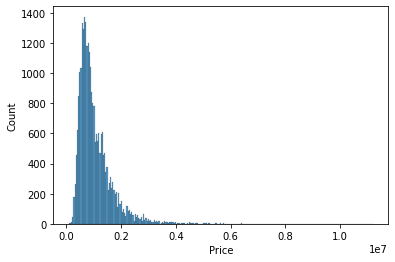

In [36]:
sns.histplot(df, x="Price")


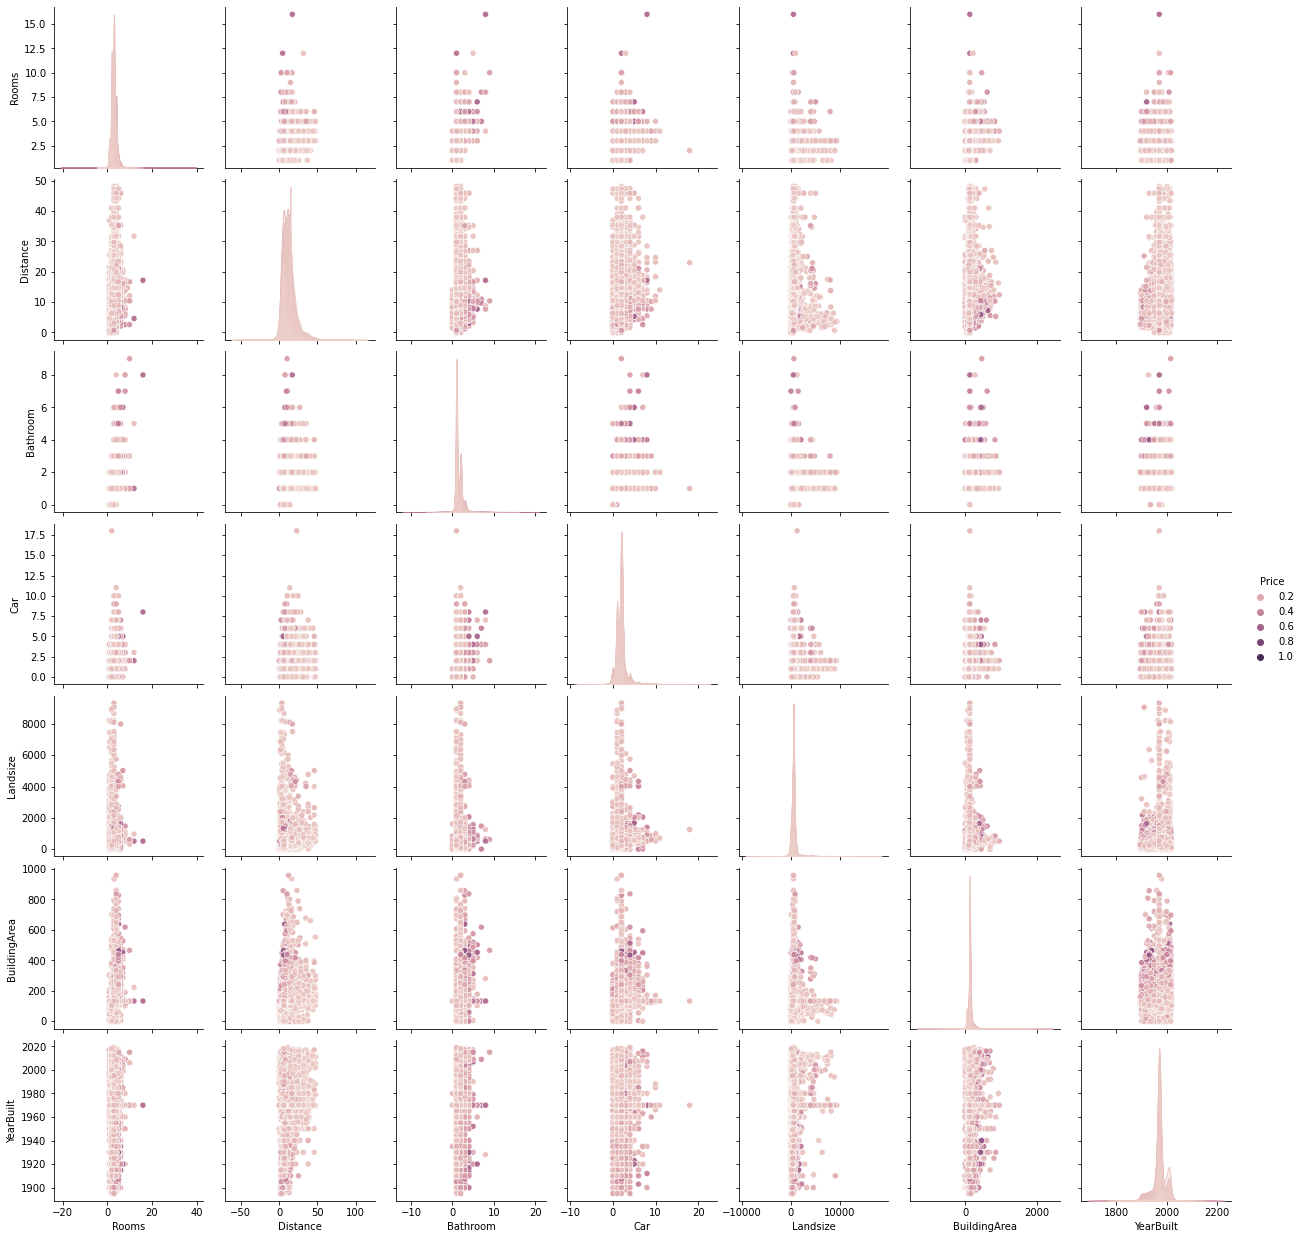

In [37]:
sns.pairplot(df, vars=["Rooms","Distance","Bathroom","Car","Landsize","BuildingArea","YearBuilt"],hue="Price")

<Axes: >

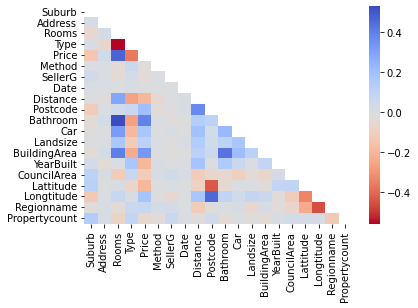

In [38]:
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(round(df.corr(),2), cmap="coolwarm_r", annot=False, mask=mask)

**Rooms and Price**: There might be a positive correlation here, as indicated by a blue shade.

**Landsize and BuildingArea**: These features often show a positive correlation, meaning that as one increases, so does the other.

**Distance and Postcode**: A relationship might exist here, potentially indicating that certain postcodes are associated with specific distances from the central business district.

**Negative Correlations**: There are a few areas with red spots, indicating negative correlations, such as between Longitude and Latitude (which might make sense geographically), and possibly Postcode and another feature.


#### Model Building

In [39]:
X=df.drop(["Price","Address"],axis=1)
y=df["Price"]
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [40]:
print(X)

[[-1.7136469  -1.03862032 -0.6593867  ... -0.00258005 -0.80881855
  -0.78975016]
 [-1.7136469  -1.03862032 -0.6593867  ... -0.04956368 -0.80881855
  -0.78975016]
 [-1.7136469   0.00859077 -0.6593867  ... -0.04016696 -0.80881855
  -0.78975016]
 ...
 [ 1.73130298 -1.03862032  0.54646255 ... -1.12868391  1.13044274
  -0.22913429]
 [ 1.73130298  0.00859077 -0.6593867  ...  0.04252425  1.13044274
  -0.22913429]
 [ 1.73130298 -1.03862032 -0.6593867  ... -0.98820283  1.13044274
  -0.22913429]]


In [41]:
X.shape

(26696, 18)

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)


In [43]:
X_train.shape


(20022, 18)

In [44]:
X_test.shape


(6674, 18)

In [45]:
y_train.shape

(20022,)

In [46]:
y_test.shape

(6674,)

In [47]:
models = {
    'Lasso': Lasso(),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(n_estimators=5, learning_rate=1.2, loss='exponential', random_state=2),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'LightGBMRegressor': LGBMRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42, learning_rate=0.03, n_estimators=150, max_depth=9),
}


#### Training and Evaluation Metrics


In [48]:
model_names = []
r2_scores = []

for model_name, model_instance in models.items():
    print(f"-----{model_name}-----")

    model_instance.fit(X_train, y_train)
    y_pred = model_instance.predict(X_test)

    mae = round(mean_absolute_error(y_test, y_pred), 2)
    mse = round(mean_squared_error(y_test, y_pred, squared=True), 2)
    rmse = round(mean_squared_error(y_test, y_pred, squared=False), 2)
    r2 = round(r2_score(y_test, y_pred), 2)

    model_names.append(model_name)
    r2_scores.append(r2)

    print("MAE Score: ", mae)
    print("MSE Score: ", mse)
    print("RMSE Score: ", rmse)
    print("R-Squared Score: ", r2)
    print("\n")


-----Lasso-----
MAE Score:  267797.46
MSE Score:  173820009419.63
RMSE Score:  416917.27
R-Squared Score:  0.56


-----LinearRegression-----
MAE Score:  267797.84
MSE Score:  173819994444.01
RMSE Score:  416917.25
R-Squared Score:  0.56


-----Ridge-----
MAE Score:  267794.54
MSE Score:  173820574429.95
RMSE Score:  416917.95
R-Squared Score:  0.56


-----ElasticNet-----
MAE Score:  280559.67
MSE Score:  200313520849.66
RMSE Score:  447563.99
R-Squared Score:  0.49


-----KNeighborsRegressor-----
MAE Score:  213261.95
MSE Score:  132118804872.94
RMSE Score:  363481.51
R-Squared Score:  0.67


-----AdaBoostRegressor-----
MAE Score:  327909.83
MSE Score:  218596026606.01
RMSE Score:  467542.54
R-Squared Score:  0.45


-----GradientBoostingRegressor-----
MAE Score:  189126.48
MSE Score:  105060357023.26
RMSE Score:  324130.15
R-Squared Score:  0.73


-----LightGBMRegressor-----
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000852 seconds.
You can 

#### Observations:

KNeighborsRegressor performs moderately well, with better MAE, MSE, and RMSE than linear models but still not as good as other non-linear models.

AdaBoostRegressor performs the worst among the non-linear models with the highest MAE and RMSE, and the lowest R² score.
GradientBoostingRegressor, LightGBM, RandomForest, and XGBoost outperform the others with significantly lower MAE, MSE, and RMSE, and higher R² scores.

LightGBMRegressor and XGBoost are the top-performing models, with LightGBM having the lowest MSE and RMSE and XGBoost the lowest MAE.

#### Summary:

Best Performing Models: LightGBMRegressor, XGBoost, and GradientBoostingRegressor. These models achieve the highest accuracy with the lowest error rates.

Moderately Performing Models: RandomForestRegressor and KNeighborsRegressor also perform well but are slightly outperformed by the top models.

Underperforming Models: AdaBoostRegressor and ElasticNet show the least accuracy and highest error rates among the models compared.

Given these results, **LightGBMRegressor and XGBoost** appear to be the best choices for this dataset, providing the most accurate predictions with the lowest error rates.

In [49]:
results = pd.DataFrame({'Model': model_names, 'R-squared': r2_scores})
results = results.sort_values(by='R-squared', ascending=True)

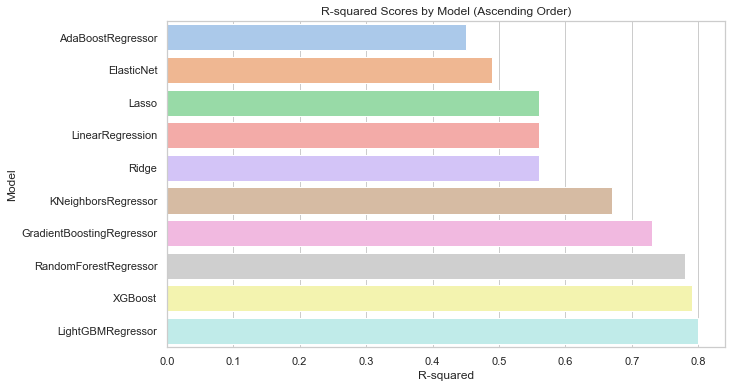

In [50]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x='R-squared', y='Model', data=results, palette="pastel")
ax.set(xlabel="R-squared", ylabel="Model")
plt.title("R-squared Scores by Model (Ascending Order)")
plt.show()

In [51]:
import lightgbm as lgb

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Specify your parameters
params = {
    'objective': 'regression',
    'metric': 'mae',  
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'max_depth': -1,
    'min_data_in_leaf': 20,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1
}

# Train the model
lgbm_model = lgb.train(params,
                       train_data,
                       valid_sets=[test_data],
                       num_boost_round=1000
                       )

# Predict
y_pred = lgbm_model.predict(X_test, num_iteration=lgbm_model.best_iteration)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')


MAE: 160778.4490629141
MSE: 76485027371.39507
RMSE: 276559.2655677894
R²: 0.8065897952156558


These results indicate that the model is performing quite well in predicting house prices:

**MAE (160,679.79):**

The MAE value suggests that, on average, the predictions are off by about $160,679. While this may seem high, it is essential to contextualize this error within the typical price range of properties in the dataset. Given that the dataset likely includes properties ranging from hundreds of thousands to millions of dollars, an error of this magnitude might be acceptable. However, it is something to consider if more precision is needed, especially for lower-priced properties.

**MSE (76,016,094,200.98) and RMSE (275,710.16):**

The MSE is quite large due to the squaring of errors, which tends to exaggerate the impact of larger errors. However, the RMSE, which is in the same units as the house prices, shows that on average, the model's predictions deviate from the actual prices by around $275,710. This level of error is significant but not entirely unexpected in a complex market like real estate. It indicates that while the model is generally accurate, there are some instances where predictions deviate more substantially from actual values, possibly due to outliers or unique property features not well captured by the model.

**R² Score (0.808):**

The R² score of 0.808 is particularly promising, indicating that about 81% of the variance in house prices is explained by the model. This suggests that the model effectively captures the majority of factors that influence house prices, making it a strong predictor overall. An R² score above 0.8 is generally considered good in real estate predictions, implying that the model has a solid understanding of the underlying market dynamics.

**Conclusion and Next Steps**
Overall, the model's performance is quite strong, especially in terms of its ability to explain the variance in house prices (as indicated by the R² score). However, the relatively high MAE and RMSE values suggest there is room for improvement, particularly in reducing prediction errors for individual properties.

### Improve the model

#### Features selection

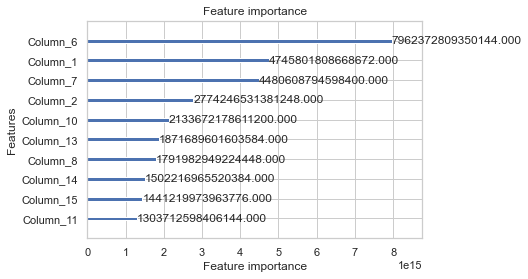

In [52]:
lgb.plot_importance(lgbm_model, max_num_features=10, importance_type='gain')
plt.show()


In [53]:
# Get the names of the columns after dropping "Price" and "Address"
feature_names = df.drop(["Price", "Address"], axis=1).columns

# Print the feature names with their corresponding indices
for i, feature in enumerate(feature_names):
    print(f"Column_{i}: {feature}")


Column_0: Suburb
Column_1: Rooms
Column_2: Type
Column_3: Method
Column_4: SellerG
Column_5: Date
Column_6: Distance
Column_7: Postcode
Column_8: Bathroom
Column_9: Car
Column_10: Landsize
Column_11: BuildingArea
Column_12: YearBuilt
Column_13: CouncilArea
Column_14: Lattitude
Column_15: Longtitude
Column_16: Regionname
Column_17: Propertycount


In [64]:
selected_features = ['Rooms', 'Type', 'Distance', 'Postcode','Bathroom','Landsize', 'BuildingArea', 'CouncilArea']

# Use only the selected features for X
X_selected = df[selected_features]
y=df["Price"]

# Continue scaling and splitting the data
scaler = StandardScaler()
X_selected = scaler.fit_transform(X_selected)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, random_state=42)


In [65]:
import lightgbm as lgb

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Specify your parameters
params = {
    'objective': 'regression',
    'metric': 'mae',  
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'max_depth': -1,
    'min_data_in_leaf': 20,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1
}

# Train the model
lgbm_model = lgb.train(params,
                       train_data,
                       valid_sets=[test_data],
                       num_boost_round=1000
                       )

# Predict
y_pred = lgbm_model.predict(X_test, num_iteration=lgbm_model.best_iteration)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')


MAE: 172475.51531228336
MSE: 86079760596.45029
RMSE: 293393.5251440466
R²: 0.7823272776787514


In [66]:
# Train models on the selected features
models = {
    'Lasso': Lasso(),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(n_estimators=5, learning_rate=1.2, loss='exponential', random_state=2),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'LightGBMRegressor': LGBMRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42, learning_rate=0.03, n_estimators=150, max_depth=9),
}

model_names = []
r2_scores = []

for model_name, model_instance in models.items():
    print(f"-----{model_name}-----")

    model_instance.fit(X_train, y_train)
    y_pred = model_instance.predict(X_test)

    mae = round(mean_absolute_error(y_test, y_pred), 2)
    mse = round(mean_squared_error(y_test, y_pred, squared=True), 2)
    rmse = round(mean_squared_error(y_test, y_pred, squared=False), 2)
    r2 = round(r2_score(y_test, y_pred), 2)

    model_names.append(model_name)
    r2_scores.append(r2)

    print("MAE Score: ", mae)
    print("MSE Score: ", mse)
    print("RMSE Score: ", rmse)
    print("R-Squared Score: ", r2)
    print("\n")


-----Lasso-----
MAE Score:  279753.4
MSE Score:  183629906384.48
RMSE Score:  428520.6
R-Squared Score:  0.54


-----LinearRegression-----
MAE Score:  279753.76
MSE Score:  183629894923.85
RMSE Score:  428520.59
R-Squared Score:  0.54


-----Ridge-----
MAE Score:  279750.31
MSE Score:  183630608903.68
RMSE Score:  428521.42
R-Squared Score:  0.54


-----ElasticNet-----
MAE Score:  296695.12
MSE Score:  216565209603.67
RMSE Score:  465365.67
R-Squared Score:  0.45


-----KNeighborsRegressor-----
MAE Score:  201307.2
MSE Score:  118092390094.91
RMSE Score:  343645.73
R-Squared Score:  0.7


-----AdaBoostRegressor-----
MAE Score:  357598.63
MSE Score:  248148851449.4
RMSE Score:  498145.41
R-Squared Score:  0.37


-----GradientBoostingRegressor-----
MAE Score:  191979.08
MSE Score:  107005705241.38
RMSE Score:  327117.27
R-Squared Score:  0.73


-----LightGBMRegressor-----
MAE Score:  174005.14
MSE Score:  88028147856.13
RMSE Score:  296695.38
R-Squared Score:  0.78


-----RandomForestReg

In [67]:

# Example values for new predictions
data = {
    'Rooms': [3, 4],  # Number of rooms
    'Type': ['h', 'u'],  # Property type (e.g., house (h), unit (u))
    'Distance': [10, 15],  # Distance from city center
    'Postcode': [3067, 3000],  # Postcodes
    'Bathroom': [2, 3],  # Number of bathrooms
    'Landsize': [550, 400],  # Land size in square meters
    'BuildingArea': [150, 200],  # Building area in square meters
    'CouncilArea': ['Yarra City Council', 'Melbourne City Council']  # Council area
}

# Create the DataFrame
new_data_df = pd.DataFrame(data)

# Since model is LightGBM which can handle categorical features natively,
# Convert categorical columns to category dtype
for col in ['Type', 'Postcode', 'CouncilArea']:
    new_data_df[col] = new_data_df[col].astype('category')

# Display the DataFrame
print(new_data_df)


   Rooms Type  Distance Postcode  Bathroom  Landsize  BuildingArea  \
0      3    h        10     3067         2       550           150   
1      4    u        15     3000         3       400           200   

              CouncilArea  
0      Yarra City Council  
1  Melbourne City Council  


In [68]:
# Predict on new data
new_predictions = lgbm_model.predict(new_data_df)

# Add predictions to the new data for better understanding
new_data_df['Predicted_Price'] = new_predictions

# Display or save the results
print(new_data.head())

   Suburb  Rooms  Type  Method  SellerG          Date  Distance  Postcode  \
0      35      3     1       3       15  1.725149e+09      10.5      3000   
1      12      2     2       1       25  1.725235e+09       5.2      3145   

   Bathroom  Car  Landsize  BuildingArea  YearBuilt  CouncilArea  Lattitude  \
0         2    1       300           120       1995            5   -37.8103   
1         1    1       450            85       1980           10   -37.8602   

   Longtitude  Regionname  Propertycount  Predicted_Price  
0    144.9622           2           8500     1.746318e+06  
1    144.9981           3          12000     1.398376e+06  


In [69]:
lgbm_model.save_model('lgbm_model.txt')


In [73]:
df['CouncilArea'].unique()

array(['Yarra City Council', 'Moonee Valley City Council',
       'Port Phillip City Council', 'Darebin City Council',
       'Hobsons Bay City Council', 'Stonnington City Council',
       'Boroondara City Council', 'Monash City Council',
       'Glen Eira City Council', 'Whitehorse City Council',
       'Maribyrnong City Council', 'Bayside City Council',
       'Moreland City Council', 'Manningham City Council',
       'Melbourne City Council', 'Banyule City Council',
       'Brimbank City Council', 'Kingston City Council',
       'Hume City Council', 'Knox City Council', 'Maroondah City Council',
       'Casey City Council', 'Melton City Council',
       'Greater Dandenong City Council', 'Nillumbik Shire Council',
       'Cardinia Shire Council', 'Whittlesea City Council',
       'Frankston City Council', 'Macedon Ranges Shire Council',
       'Yarra Ranges Shire Council', 'Wyndham City Council',
       'Moorabool Shire Council', 'Mitchell Shire Council', nan],
      dtype=object)